## Mini Project  - Nguyễn Khánh Long

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Source: National Basketball Association(NBA) Dataset
https://www.kaggle.com/amanajmera1/national-basketball-associationnba-dataset

## Understanding the Data

### `NBA_train.csv`: 835 ob. of 20 variables

- **W**: games' wins
- **Playoffs**: make it to the post-season/playoff or not(1:Yes, 0: No)
- **PTS**: points made
- **oppPTS**: points allowed



## Objective:
Finding the correlation between wins and playoff appearances

## Reading the data in

In [93]:
df = pd.read_csv('NBA_train.csv')

In [107]:
df.shape

(835, 20)

In [94]:
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [106]:
tbl = df[['Team','Playoffs','W']]
tbl.head(20)


,Team,Playoffs,W
0,Atlanta Hawks,1,50
1,Boston Celtics,1,61
2,Chicago Bulls,0,30
3,Cleveland Cavaliers,0,37
4,Denver Nuggets,0,30
5,Detroit Pistons,0,16
6,Golden State Warriors,0,24
7,Houston Rockets,1,41
8,Indiana Pacers,0,37
9,Kansas City Kings,1,47


In [96]:
i[df['W'] < 35].head(30)

,Team,Playoffs,W
2,Chicago Bulls,0,30
4,Denver Nuggets,0,30
5,Detroit Pistons,0,16
6,Golden State Warriors,0,24
12,New Jersey Nets,0,34
20,Utah Jazz,0,24
22,Atlanta Hawks,0,31
25,Cleveland Cavaliers,0,28
26,Dallas Mavericks,0,15
28,Detroit Pistons,0,21


In [97]:
i[df['W'] > 45].head(50)

,Team,Playoffs,W
0,Atlanta Hawks,1,50
1,Boston Celtics,1,61
9,Kansas City Kings,1,47
10,Los Angeles Lakers,1,60
11,Milwaukee Bucks,1,49
14,Philadelphia 76ers,1,59
15,Phoenix Suns,1,55
19,Seattle SuperSonics,1,56
23,Boston Celtics,1,62
33,Los Angeles Lakers,1,54


In [98]:
cdf = df[['Team','Playoffs','W','PTS','oppPTS']]

In [99]:
cdf['Pts_Diff'] = cdf['PTS'] - cdf['oppPTS']

<ipython-input-99-565b766ef5e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['Pts_Diff'] = cdf['PTS'] - cdf['oppPTS']


In [100]:
cdf

,Team,Playoffs,W,PTS,oppPTS,Pts_Diff
0,Atlanta Hawks,1,50,8573,8334,239
1,Boston Celtics,1,61,9303,8664,639
2,Chicago Bulls,0,30,8813,9035,-222
3,Cleveland Cavaliers,0,37,9360,9332,28
4,Denver Nuggets,0,30,8878,9240,-362
...,...,...,...,...,...,...
830,Sacramento Kings,0,24,8151,8589,-438
831,San Antonio Spurs,1,61,8502,8034,468
832,Toronto Raptors,0,22,8124,8639,-515
833,Utah Jazz,0,39,8153,8303,-150


In [102]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

0.032760017350374815 41.0175133337684


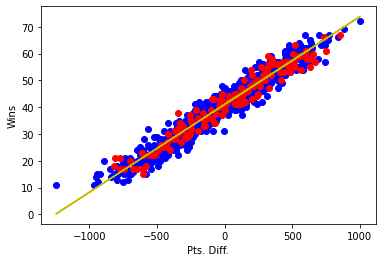

In [105]:
plt.scatter(train.Pts_Diff, train.W,  color='blue')
plt.xlabel("Pts. Diff.")
plt.ylabel("Wins")
plt.scatter(test.Pts_Diff, test.W,  color='red')
plt.xlabel("Pts. Diff.")
plt.ylabel("Wins")

m,b = np.polyfit(train.Pts_Diff, train.W, 1)
print(m,b)
plt.plot(train.Pts_Diff,m*train.Pts_Diff+b,'y')


## Conclusion:
-   A team needs to win at least 42 games to make it to the playoff.
-   Points difference needs to be at least: (42-41)/(0.03276) = 30.52 -> at least 31 more points than allowed to win at least 42 games.
